In [1]:
!pip install wordcloud

In [4]:
!pip install matplotlib

--- 1. 워드클라우드 생성용 문자열 (일부) ---
excel exampl sentenc creat nlp mission design show...

--- 2. 영어 워드클라우드 시각화 ---


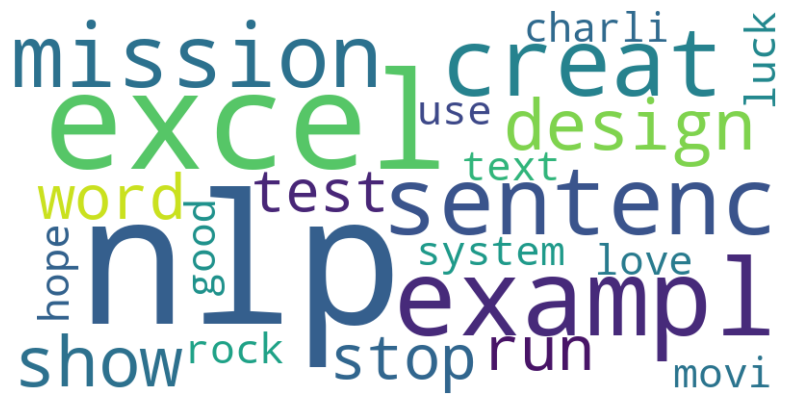

In [6]:
# 2-space 인덴트를 사용합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- 1. [과제 3]에서 만든 최종 단어 리스트 ---
# (PorterStemmer로 어간 추출까지 완료된 상태라 가정)
tokens_en = [
  'excel', 'exampl', 'sentenc', 'creat', 'nlp', 'mission',
  'design', 'show', 'stop', 'word', 'run', 'test',
  'system', 'love', 'movi', 'nlp', 'rock',
  'hope', 'text', 'use', 'good', 'luck', 'charli'
]

# --- 2. 워드클라우드 생성 (중요!) ---
# WordCloud는 리스트가 아닌, '하나의 긴 문자열'을 입력으로 받습니다.
# 따라서 리스트를 공백으로 연결(join)해야 합니다.
text_en_for_wc = " ".join(tokens_en)

print("--- 1. 워드클라우드 생성용 문자열 (일부) ---")
print(text_en_for_wc[:50] + "...")

# 3. WordCloud 객체 생성 및 시각화
# background_color='white': 배경을 흰색으로
wordcloud_en = WordCloud(
  background_color='white',
  width=800,
  height=400
).generate(text_en_for_wc)

print("\n--- 2. 영어 워드클라우드 시각화 ---")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_en, interpolation='bilinear')
plt.axis('off') # 축 눈금 제거
plt.show() #

In [7]:
# --- 0. (Colab 전용) 한글 폰트(나눔고딕) 설치 ---
!sudo apt-get -y install fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 41 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# (soynlp 또는 Okt로 토큰화 및 불용어 제거가 끝난 상태라 가정)
tokens_ko = [
  '안녕하세요', '님', '과제에', '오신', '것을', '환영합니다', '이것은',
  '테스트를', '위해', '만들었어요', '숫자', '특수문자가', '포함된',
  '텍스트는', '전처리가', '필요합니다', '형태소', '분석은', '처음엔',
  '조금', '어려웠지만', '정말'
]

--- 1. 워드클라우드 생성용 문자열 (일부) ---
안녕하세요 님 과제에 오신 것을 환영합니다 이것은 테스트를 위해 만들었어요 숫자 특수문자가...

--- 2. 한국어 워드클라우드 시각화 ---


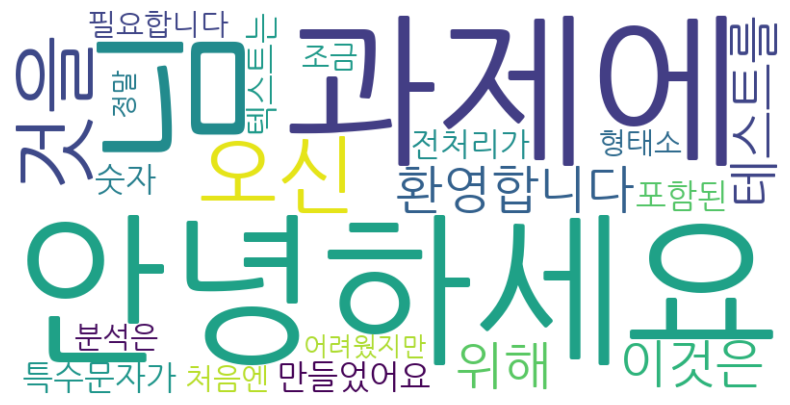

In [3]:

# --- 2. 워드클라우드 생성용 문자열로 변환 ---
text_ko_for_wc = " ".join(tokens_ko)

print("--- 1. 워드클라우드 생성용 문자열 (일부) ---")
print(text_ko_for_wc[:50] + "...")

# --- 3. WordCloud 객체 생성 및 시각화 (핵심!) ---
# 폰트 경로 지정 (Colab의 기본 나눔고딕 경로)
font_path_ko = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud_ko = WordCloud(
  font_path=font_path_ko, # <- 이 부분이 필수!
  background_color='white',
  width=800,
  height=400
).generate(text_ko_for_wc)

print("\n--- 2. 한국어 워드클라우드 시각화 ---")
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ko, interpolation='bilinear')
plt.axis('off') # 축 눈금 제거
plt.show() #

In [4]:
!pip install wordcloud matplotlib Pillow nltk

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') # 불용어 제거 후 품사 태깅에 사용

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 이미지 처리를 위한 라이브러리
import numpy as np # 이미지를 배열로 다루기 위해

In [7]:
# 1. 풍부한 샘플 영어 텍스트 (더 많은 내용 추가)
long_text_en = """
Natural Language Processing (NLP) is a fascinating field at the intersection of computer science,
artificial intelligence, and linguistics. It focuses on enabling computers to understand,
interpret, and generate human language in a valuable way. This mission specifically aims
to introduce fundamental concepts and practical skills in NLP, starting with essential text
preprocessing techniques.

Our journey begins with regular expressions, a powerful tool for pattern extraction and cleaning
raw text data. We then move on to basic text preprocessing steps, which include tokenization,
lower-casing, stop word removal, and stemming or lemmatization. These steps are crucial
for transforming unstructured text into a format suitable for analysis and model training.

Understanding the characteristics of our text data is key, so we'll analyze sentence lengths.
This provides insights into the typical verbosity and structure of the documents.
Visualization plays a vital role in NLP, and generating word clouds is an excellent
way to visually represent the most frequent terms in a corpus. It's an intuitive method
to quickly grasp the dominant themes and keywords.

Finally, we will apply these foundational skills to build a simple sentiment analysis model.
This model will classify text as positive or negative, demonstrating a practical application
of the entire NLP pipeline we've built. The goal is to provide a comprehensive understanding
of how to take raw text, clean it, analyze it, visualize it, and ultimately use it
for predictive tasks. We hope this educational experience is both challenging and rewarding.
Good luck on your NLP adventures!
"""

print("--- 1. 원본 영어 텍스트 (일부) ---")
print(long_text_en[:300] + "...\n")

--- 1. 원본 영어 텍스트 (일부) ---

Natural Language Processing (NLP) is a fascinating field at the intersection of computer science,
artificial intelligence, and linguistics. It focuses on enabling computers to understand,
interpret, and generate human language in a valuable way. This mission specifically aims
to introduce fundament...



In [8]:

# 2-1. 정규표현식으로 정제 (숫자, 특수문자 제거) 및 소문자화
text_cleaned = re.sub(r'[^a-zA-Z\s]', '', long_text_en)
text_cleaned = text_cleaned.lower()
text_cleaned = re.sub(r'\s+', ' ', text_cleaned).strip() # 다중 공백 제거

print("--- 2. 전처리 후 텍스트 (일부) ---")
print(text_cleaned[:300] + "...\n")

--- 2. 전처리 후 텍스트 (일부) ---
natural language processing nlp is a fascinating field at the intersection of computer science artificial intelligence and linguistics it focuses on enabling computers to understand interpret and generate human language in a valuable way this mission specifically aims to introduce fundamental concep...



In [11]:
# 2-2. 토큰화
tokens = word_tokenize(text_cleaned)

# 2-3. 불용어 제거
stop_words_en = set(stopwords.words('english'))
tokens_clean = [word for word in tokens if word not in stop_words_en and len(word) > 1] # 1글자 단어도 제거

In [12]:
# 2-4. 어간 추출
stemmer = PorterStemmer()
tokens_final = [stemmer.stem(word) for word in tokens_clean]

print("--- 3. 최종 전처리된 단어 (일부) ---")
print(tokens_final[:30] , "...\n")


--- 3. 최종 전처리된 단어 (일부) ---
['natur', 'languag', 'process', 'nlp', 'fascin', 'field', 'intersect', 'comput', 'scienc', 'artifici', 'intellig', 'linguist', 'focus', 'enabl', 'comput', 'understand', 'interpret', 'gener', 'human', 'languag', 'valuabl', 'way', 'mission', 'specif', 'aim', 'introduc', 'fundament', 'concept', 'practic', 'skill'] ...



In [13]:

# 3-1. 워드클라우드 생성용 문자열로 변환
text_for_wc = " ".join(tokens_final)

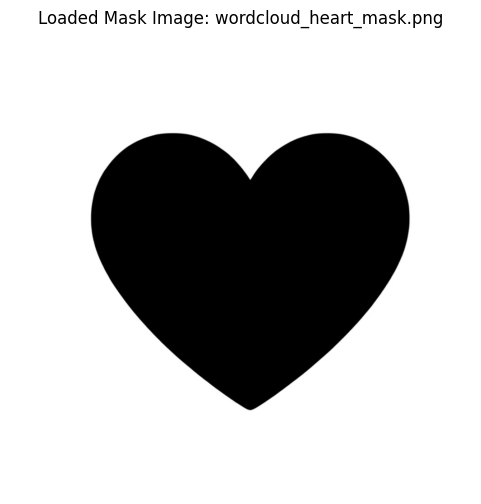


--- 4. 마스킹된 영어 워드클라우드 시각화 ---


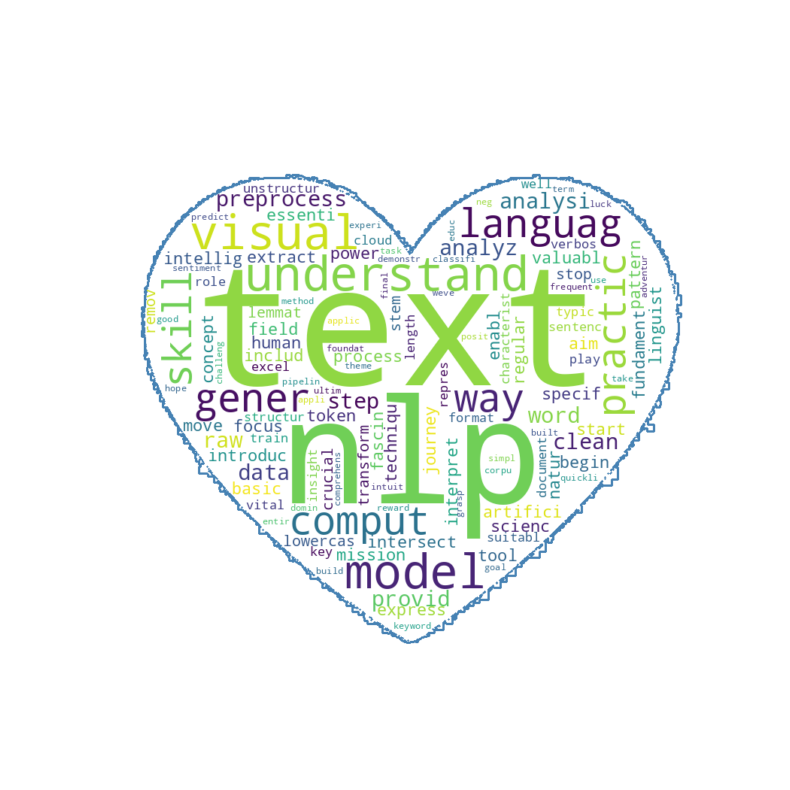

In [14]:

# 3-2. 마스크 이미지 로드 및 전처리
try:

  mask_path = 'wordcloud_heart_mask.png'
  mask = np.array(Image.open(mask_path))

  # 이미지 시각화 (마스킹이 어떻게 생겼는지 확인)
  plt.figure(figsize=(6, 6))
  plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear') # 회색 맵으로 마스크 이미지 확인
  plt.title(f"Loaded Mask Image: {mask_path}")
  plt.axis('off')
  plt.show() #

  # 3-3. WordCloud 객체 생성 (mask 인자 추가)
  wordcloud_masked = WordCloud(
    background_color='white',
    width=800,
    height=400,
    mask=mask, # <- 마스크 이미지 적용!
    contour_width=3, # 마스크 테두리 두께 (선택 사항)
    contour_color='steelblue' # 마스크 테두리 색상 (선택 사항)
  ).generate(text_for_wc)

  print("\n--- 4. 마스킹된 영어 워드클라우드 시각화 ---")
  plt.figure(figsize=(10, 10)) # 마스크 모양에 따라 figsize 조정
  plt.imshow(wordcloud_masked, interpolation='bilinear')
  plt.axis('off')
  plt.show() #

except FileNotFoundError:
  print(f"\n오류: 마스크 이미지 파일 '{mask_path}'을(를) 찾을 수 없습니다.")
  print("Google Colab 왼쪽의 폴더 아이콘을 클릭하여 마스크 이미지 파일을 업로드해 주세요.")
  print("또는 mask_path 변수의 파일 이름을 올바르게 지정했는지 확인해 주세요.")
  # 마스크 없이 기본 워드클라우드 생성
  print("\n--- 4. 마스크 없이 기본 워드클라우드 시각화 (오류 발생 시) ---")
  wordcloud_basic = WordCloud(
    background_color='white',
    width=800,
    height=400
  ).generate(text_for_wc)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud_basic, interpolation='bilinear')
  plt.axis('off')
  plt.show() #

In [30]:
def masking(mask_path, text_for_wc):

# 3-2. 마스크 이미지 로드 및 전처리
  try:
    img_pil = Image.open(mask_path)

    # 1. 이미지를 회색조(Grayscale, 'L' mode)로 변환
    # (알파 채널(투명도)을 깔끔하게 처리하고 1채널로 만듦)
    # 'L' 모드는 0(검은색) ~ 255(흰색) 값을 가짐
    img_gray = img_pil.convert('L')
    mask = np.array(img_gray)

    # 이미지 시각화 (마스킹이 어떻게 생겼는지 확인)
    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear') # 회색 맵으로 마스크 이미지 확인
    plt.title(f"Loaded Mask Image: {mask_path}")
    plt.axis('off')
    plt.show() #

    # 3-3. WordCloud 객체 생성 (mask 인자 추가)
    wordcloud_masked = WordCloud(
      background_color='white',
      width=800,
      height=400,
      mask=mask, # <- 마스크 이미지 적용!
      contour_width=3, # 마스크 테두리 두께 (선택 사항)
      contour_color='steelblue' # 마스크 테두리 색상 (선택 사항)
    ).generate(text_for_wc)

    print("\n--- 4. 마스킹된 영어 워드클라우드 시각화 ---")
    plt.figure(figsize=(10, 10)) # 마스크 모양에 따라 figsize 조정
    plt.imshow(wordcloud_masked, interpolation='bilinear')
    plt.axis('off')
    plt.show() #

  except FileNotFoundError:
    print(f"\n오류: 마스크 이미지 파일 '{mask_path}'을(를) 찾을 수 없습니다.")
    print("Google Colab 왼쪽의 폴더 아이콘을 클릭하여 마스크 이미지 파일을 업로드해 주세요.")
    print("또는 mask_path 변수의 파일 이름을 올바르게 지정했는지 확인해 주세요.")
    # 마스크 없이 기본 워드클라우드 생성
    print("\n--- 4. 마스크 없이 기본 워드클라우드 시각화 (오류 발생 시) ---")
    wordcloud_basic = WordCloud(
      background_color='white',
      width=800,
      height=400
    ).generate(text_for_wc)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_basic, interpolation='bilinear')
    plt.axis('off')
    plt.show() #

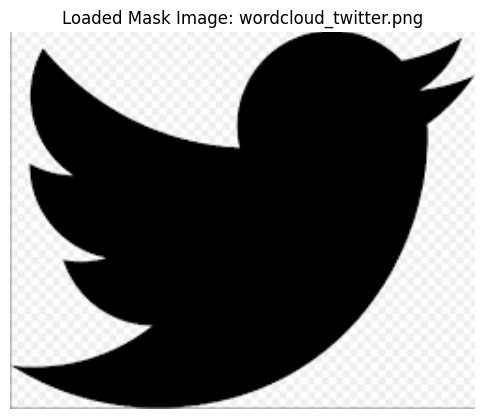


--- 4. 마스킹된 영어 워드클라우드 시각화 ---


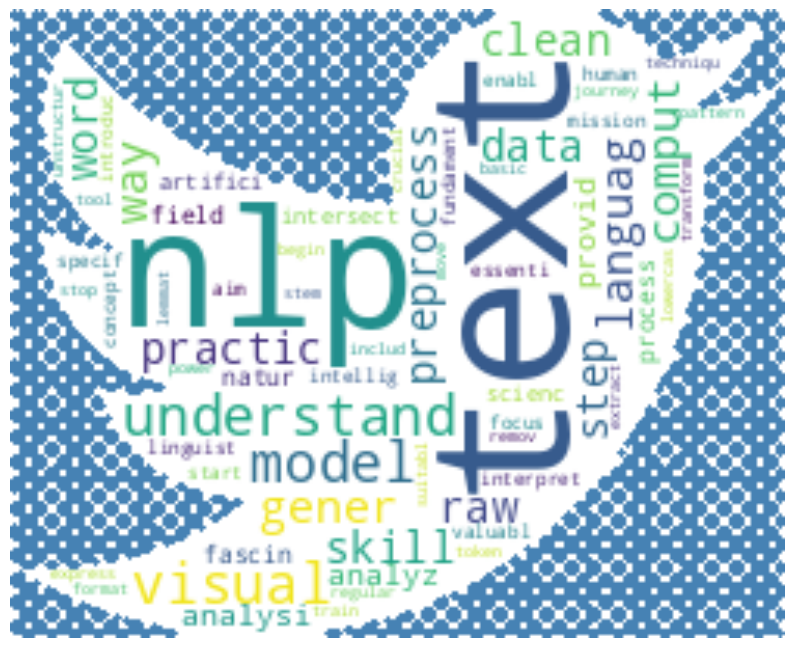

In [31]:
masking('wordcloud_twitter.png', text_for_wc)